### EDA and Logistic Regression on Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring Data

#### Missing Values

In [92]:
train[train.isna().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


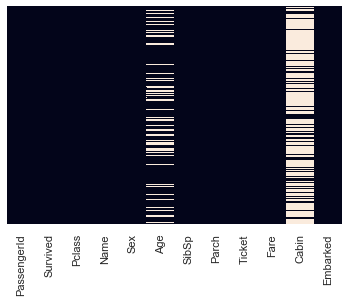

In [93]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

Age column can be replaced with some form of imputation. Cabin column contains too many null values and we may have to drop this column or simply to 0 and 1. 

#### Survived

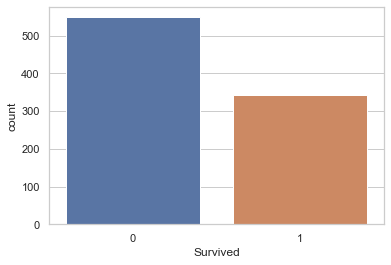

In [33]:
#Count Survived
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

#### Survived by Sex

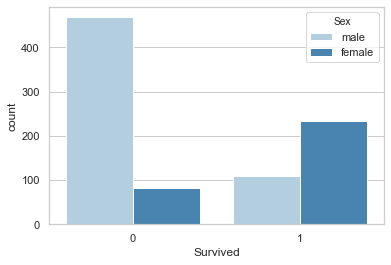

In [66]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'Blues')

Most of those who did not survive were male. More females survivied. (This does match the movie where they tried to save the women and the children)

#### Survivied by Class

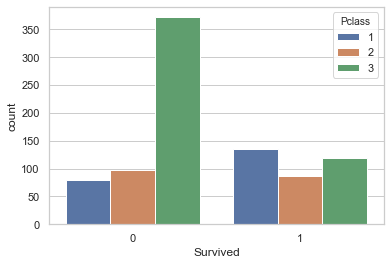

In [45]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

Most of those who did not survive were of class 3 (lowest class of the 3). (Also matches the movie; the lower class people weren't able to get on the boats)

#### Age

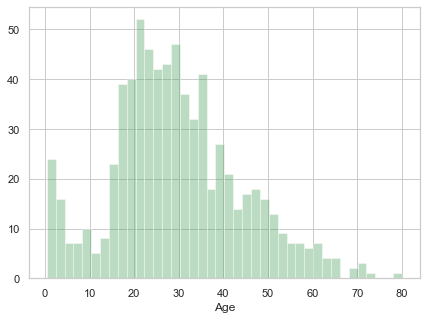

In [70]:
plt.figure(figsize = (7,5))
sns.distplot(a = train['Age'].dropna(), bins = 40, kde = False, color = 'g')

Large part of the distribution is between ages 20-35.

#### SibSp

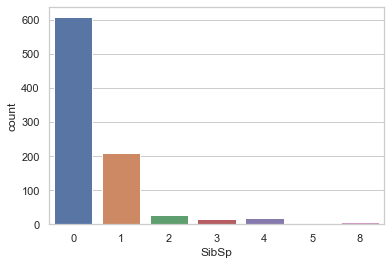

In [58]:
sns.countplot(data = train, x = 'SibSp')

Most were not with siblings or spouse.

#### Fare

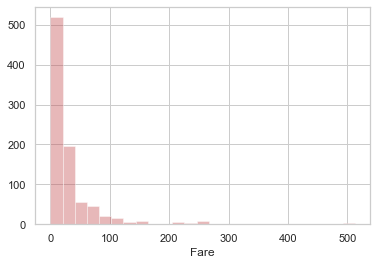

In [71]:
sns.distplot(a = train['Fare'], kde = False, bins = 25, color = 'r')

We can assume that there were more lower class people on the Titanic from the 'Pclass' graph so it makes sense that most people paid a low fare.

### Fill in Null Values 

Instead of dropping age, we can fill in average age by Pclass. we could just do overall average but including Pclass can be more accurate since higher class people tend to be older (assumption). 

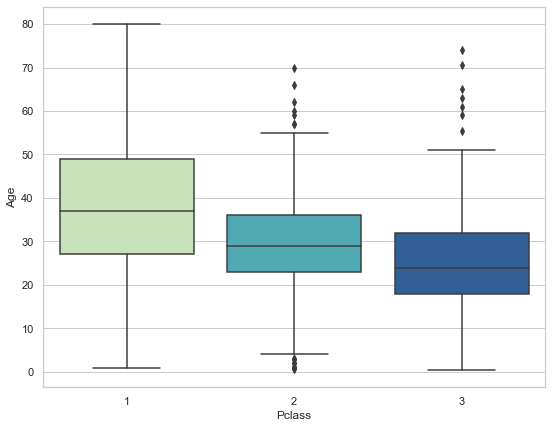

In [76]:
plt.figure(figsize = (9,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'YlGnBu')

We can see the passengers in the higher class tend to be older. We'll use these average age values by Pclass.

In [115]:
#Averages
round(train.groupby('Pclass')['Age'].mean(),0)

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [116]:
def fill_in_age(x):
    Age = x[0]
    Pclass = x[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
        
    else:
        return Age   

In [117]:
train['Age'] = train[['Age', 'Pclass']].apply(fill_in_age, axis = 1)

In [118]:
train['Age'].isnull().any()

False

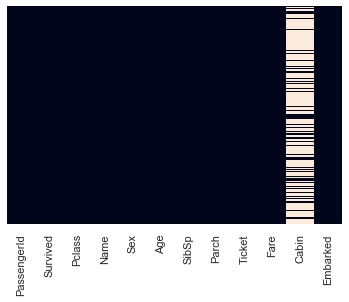

In [119]:
#show heatmap again
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

#### Clean Remaining Dataset

In [120]:
#drop Cabin column
train.drop('Cabin', axis = 1, inplace = True)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [124]:
train[train.isna().any(axis = 1)] #only two NaN left in Embarked column
#we will just drop these.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [126]:
train.dropna(inplace = True)
train.isna().any() #check

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### Converting Categorical

Before we can run the logistic regression model, we need to convert categorical features to dummy variables. 

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### Embarked, Sex

In [131]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [128]:
pd.get_dummies(train['Embarked'], drop_first = True).head()
#both 0 means it is 'C'

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [132]:
pd.get_dummies(train['Sex'], drop_first = True).head()
#1 is male, 0 is female

,male
0,1
1,0
2,0
3,0
4,1


In [133]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [135]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [136]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [141]:
train = pd.concat([train, embark, sex], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


Now, we can build our logistic regression model.

### Logistic Regression

The dataset comes with a test dataset. However, here, we are going to split the train dataset into both train and test. 

#### Train Test Split

In [145]:
test = train.drop(['Survived'], axis = 1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,3,22.0,1,0,7.2500,0,1,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,1,0
3,4,1,35.0,1,0,53.1000,0,1,0
4,5,3,35.0,0,0,8.0500,0,1,1


In [146]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(test, train['Survived'],
                                                   test_size = 0.3, 
                                                   random_state = 101)

#### Prediction

In [150]:
from sklearn.linear_model import LogisticRegression

In [152]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\nycja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
predictions = logmodel.predict(X_test)

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
accuracy = confusion_matrix(y_test, predictions)

In [156]:
accuracy

array([[150,  13],
       [ 36,  68]], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
score = accuracy_score(y_test, predictions)
score

0.8164794007490637

In [160]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

82% accuracy is pretty good.